#BINV3100 ML S4 : Théorie

##Vidéos obligatoires
Nous vous demandons de regarder et de compredre les vidéos suivante:

1.   [PRE-PROCESSING](https://www.youtube.com/watch?v=OGWwzm304Xs&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=24)
2.   [IMPUTER : NETTOYAGE DE DONNÉES](https://www.youtube.com/watch?v=QVEJJNsz-eM&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=26)
3.   [EXPLORATION DES DONNÉES](https://www.youtube.com/watch?v=u64sWJEP4S0&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=31)


A la fin de chaque vidéo, un exercice est proposé. Vous retrouverez ces exercices dans la Partie 1 des exercices de cette semaine

## La vidéo suivante est en bonus:

6.  [PIPELINE AVANCÉE](https://www.youtube.com/watch?v=41mnga4ptso&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=25)

# Partie 1: Exercices relatifs aux Vidéos Machine Learnia

[Lien vers la playlist Machine Learnia](https://www.youtube.com/playlist?list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq)



## Vidéos (22 et 23 /30) :

[MÉTRIQUE DE RÉGRESSION](https://www.youtube.com/watch?v=_TE9fDgtOaE&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=23)



## Vidéos (24 à 26/30):

[PRE-PROCESSING](https://www.youtube.com/watch?v=OGWwzm304Xs&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=24)

(Bonus) [PIPELINE AVANCÉE](https://www.youtube.com/watch?v=41mnga4ptso&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=25)

[IMPUTER : NETTOYAGE DE DONNÉES](https://www.youtube.com/watch?v=QVEJJNsz-eM&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=26)

Vous allez tester les différents Scaler sur le dataset des iris.

Pour ce faire
<ol>
<li> Importer le dataset des iris </li>
<li> Créez un Train Set et un Test Set avec le Test Set représentant 25% des données et random_State égal à 4 </li>
<li> Pour chacun des 3 scalers (StandardScaler(), MinMaxScaler et RobustScaler)</li>
<ol type="a">
<li>Créez un pipeline avec un PolynomialFeatures et un SGDClassifier (avec un random_state égal à 0 pour le SGDClassifier) </li>
<font color='red'><strong>Attention ! Renseignez-vous bien sur l'ordre dans lequel il faut placer le Scaler et le PolynomialFeatures !</strong> </font>
<li>Cherchez les meilleurs paramètres à l'aide de GridSearchCV testant 2,3,4 pour le dégré du PolynomialFeatures, et "l1", "l2" pour la pénalité du SGDClassifier</li>
<li>Afficher les meilleurs paramètres trouvé, le meilleur score ainsi que le score sur les données de test </li>
</ol>
<li>Sur base des résultats affichés au point 3., Quel scaler choisiriez-vous ? Justifiez !!</li>
</ol>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

params = {
    'polynomialfeatures__degree': [2, 3, 4],
    'sgdclassifier__penalty': ['l1', 'l2']
}

# MIN MAX
model_min_max = make_pipeline(PolynomialFeatures(), MinMaxScaler(), SGDClassifier(random_state = 0))
grid_min_max = GridSearchCV(model_min_max, param_grid = params, cv = 5)
grid_min_max.fit(X_train, y_train)
print("MIN MAX")
print(grid_min_max.best_score_)
print(grid_min_max.best_params_)
print(grid_min_max.score(X_test, y_test))

# STANDARD
model_standard = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state = 0))
grid_standard = GridSearchCV(model_standard, param_grid = params, cv = 5)
grid_standard.fit(X_train, y_train)
print("STANDARD")
print(grid_standard.best_score_)
print(grid_standard.best_params_)
print(grid_standard.score(X_test, y_test))

# ROBUST
model_robust = make_pipeline(PolynomialFeatures(), RobustScaler(), SGDClassifier(random_state = 0))
grid_robust = GridSearchCV(model_robust, param_grid = params, cv = 5)
grid_robust.fit(X_train, y_train)
print("ROBUST")
print(grid_robust.best_score_)
print(grid_robust.best_params_)
print(grid_robust.score(X_test, y_test))

MIN MAX
0.982213438735178
{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l2'}
0.9473684210526315
STANDARD
0.982213438735178
{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}
0.9210526315789473
ROBUST
0.982213438735178
{'polynomialfeatures__degree': 3, 'sgdclassifier__penalty': 'l1'}
0.9473684210526315


Réponse au 4. :



# Partie 2 : Exercices Machine Learning semaine 4

## Exercice 1 : Survivant du titanic :

<ol>
<li> Importez le dataset du titanic à l'aide de seaborn </li>
<li> Gardez uniquement les colonnes 'pclass', 'age' et 'sex' comme features et la colonne 'survived' comme target </li>
<li> Créez un Train Set et un Test set avec 20% des données pour le test set et un random_state égal à 4</li>
<li> Créez un preprocesser qui </li>
<ul>
<li> pour la colonne 'pclass' remplace les valeurs manquantes en utilisant un KNNImputer() considérant les 2 plus proches voisins pour ensuite appliquer un OneHotEncoder </li>
<li> pour la colonne 'age' remplace les valeurs manquantes par la moyenne et ensuite applique ensuite un RobustScaler </li>
<li> pour la colonne 'sex' remplace les valeurs manquantes par la valeur la plus fréquente pour ensuite appliquer un OneHotEncoder</li>
</ul>
(Astuce : utilisez make_column_transformer)
<li> Obtenez votre modèle en faisant un pipeline constitué du preprocesser suivi d'un SGDClassifier avec un random_state égal à 4 </li>
<li> Cherchez les meilleurs paramètres du SGDClassifier à l'aide d'un GridSearchCV testant 'l1' et 'l2' comme pénalité. </li>
<li> Afficher le meilleur paramètre, le meilleur score et le score obtenu sur les données de test.  </li>
<li> Essayer d'améliorer le score obtenu en 7., en essayant d'autre encoder, scaler, classifier, ...
</ol>

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder,RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer

titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis = 0, inplace = True)

titanic['sex'].replace(['female', 'male'], [0, 1], inplace = True)

y = titanic['survived']
X = titanic.drop('survived', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

ct = make_column_transformer(
    (KNNImputer(n_neighbors = 2), ['pclass']),
    (OneHotEncoder(), ['pclass']),
    (SimpleImputer(missing_values = np.nan, strategy = 'mean'), ['age']),
    (RobustScaler(), ['age']),
    (SimpleImputer(missing_values = np.nan, strategy = 'most_frequent'), ['sex']),
    (OneHotEncoder(), ['sex'])
)

model = make_pipeline(ct, SGDClassifier(random_state = 4))

params = {
    'sgdclassifier__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid = params, cv = 5)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_test, y_test))

{'sgdclassifier__penalty': 'l1'}
0.7906542056074766
0.7486033519553073


## Exercice 2 : Emprunteurs à risques
Une banque désire un modèle permettant de déterminer si un client emprunteur est à risque ou pas.
<ol>
<li> Importez le dataset customer_data.csv dans lequel la target est la colonne "label".</li>
<li> Retirer la colonne "id".  </li>
<li> Déterminez le pourcentage de valeurs manquantes dans chaque colonne. </li>
<li> Sur base du résultat du point précédent, traitez les valeurs manquantes. Justifier le choix que vous avez fait pour ces valeurs :

<strong> Justification : </strong>  </li>
<li> Dessinez la heatmap de la matrice de corrélation des features et de la target en affichant la valeur des coefficents de corrélation. </li>
<li> Sur base de la heatmap, déterminer d'une part si la target est corrélée linéairement avec une ou plusieurs features et d'autre part les features les plus corrélées linéairement entre elles.

<strong> Réponse : <strong>
</ol>

0
149
0
0
0
0
0
0
0
0
0


<Axes: >

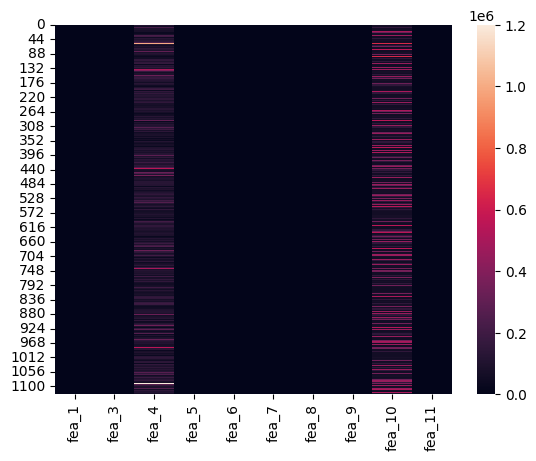

In [56]:
import seaborn as sns
import pandas as pd

data = pd.read_csv("customer_data.csv")

data = data.drop(['id'], axis = 1)

y = data['label']
X = data.drop(['label'], axis = 1)

for i in range(11):
  print(X['fea_{}'.format(i + 1)].isna().sum())

X = X.drop(['fea_2'], axis = 1)

sns.heatmap(X)